<img style="float: left;" src="attachment:D2Klogo.png" width="20%"> 

<center>

# Welcome to COMP 680 #
### Statistics for Computing and Data Science ###

### Homework 4 ###

In [1]:
### standard imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline  
plt.style.use('fivethirtyeight')
plt.rcParams["patch.force_edgecolor"] = True
import seaborn as sns

import random
random.seed(2021)

import statsmodels.api as sm
import scipy.stats as st

## Part I: Simulation Study

In this part, we will carry out simulation study to calculate Type I and Power (Type II error) empirically. Let's use the Swain vs. Alabama example in class to carry out the simulation study. 

**Question 1.1**: Design a simulation study to calculate Type I error, use $\alpha = 0.05$. Before you proceed, develop a plan and some pseudo code for the simulation.

In [2]:
### define some parameters

# significance level
alpha = 0.05
# population proportion in null hypothesis
null_p = 0.26 #percentage of black people in the population
# sample size
sample_size = 100 #jury size
# number of times to simulate
rep = 1000000

In [3]:
# simulate the sampling distribution of the test stat under the null
simu_null_dist = np.random.binomial(n=sample_size, p=null_p, size=rep)

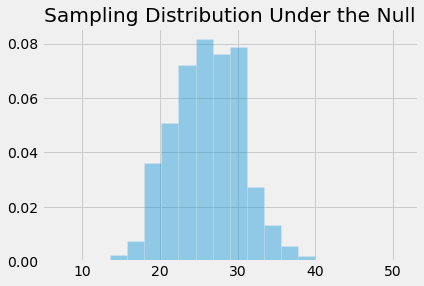

In [4]:
# create a histogram of the sampling distribution of the test stat under the null
# why it is so normal
plt.hist(simu_null_dist, bins=20, alpha=0.4, density=True)
plt.title("Sampling Distribution Under the Null");

In [5]:
# carry out tests when null is true
num_test = 10000
# in this case, obs_stat should be from null distribution as well
obs_stat = np.random.binomial(n=sample_size, p=0.26, size=num_test)

In [6]:
# place holder to same all p-values
# how many of p-values? same as length of obs_stat
p_values = []
for i in obs_stat:
    # how to calculate p-values in this case?
    one_p_value = np.average(simu_null_dist <= i)
    p_values = np.append(p_values, one_p_value)

In [7]:
### Type I Error

# this is when you reject but null is true
# we reject when p-values < alpha
I_error = np.average(p_values <= alpha)
# you should expect I_error < alpha, why???
I_error

0.0373

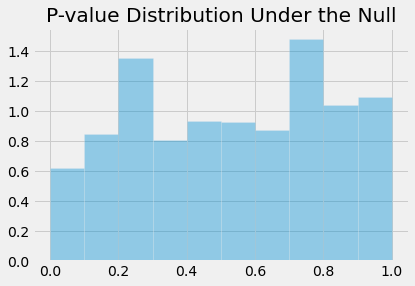

In [8]:
### Distribution of p-values under the null

plt.hist(p_values, alpha=0.4, density=True)
plt.title("P-value Distribution Under the Null");

The purpose of plotting all the p-values is to convince you that p-values under the null follow Uniform[0, 1] distribution. If it is not so obvious, increase the number of test to 1000000 (warning: it may take a long time to run...)

We will not do the proof, but if you remember a CDF of any continuous random variable is a Uniform[0, 1]. While a p-value under the null is not exactly a CDF, but a tail probability is almost the CDF…

**Question 1.2**: Design a simulation study to calculate Type II error and Power, also use $\alpha = 0.05$. Now this is a scenario that the observed data is not from the null hypothesis. In order to be able to calculate the probability, we will need to make an assumption about what the "true" data generating mechanism is. But the beauty of simulation is that you can always change the assumptions and rerun your code! You can also reuse some of the parameters we defined in previous question, including the `simu_null_dist`.

In [9]:
### define some more parameters

# "the real population proportion" that data is from
# let's assume it is 0.15 instead of 0.26 which reflect selection bias of jury panel
pop_p = 0.15

In [10]:
# generate data to perform the tests
num_test = 10000
# in this case, obs_stat should NOT be from the null
# but from some alternative distribution defined by pop_p
obs_stat = np.random.binomial(n=sample_size, p=pop_p, size=num_test)

In [11]:
# carry out tests when null is NOT true
# calculate the p-values for each test
# notice p-values are calculated in the same way as in previous problem!
p_values = []
for i in obs_stat:
    one_p_value = np.average(simu_null_dist <= i)
    p_values = np.append(p_values, one_p_value)

In [12]:
p_values

array([1.52168e-01, 6.55230e-02, 1.22120e-02, ..., 1.22120e-02,
       1.90000e-05, 4.90000e-04])

In [13]:
### Type II Error and Power

# this is when you fail to reject but null is NOT true
II_error = np.average(p_values > alpha)
# Power is 1 - type II error
Power = 1 - II_error
print(II_error, Power)

0.1632 0.8368


**Question 1.3**: Now rewrite the code into modular functions, and perform a power analysis. In particular, we would like to vary the sample size and the data generating assumption, and see how does each affect the power of the same test.

In [14]:
### function to generate sampling distribution under the null

def null_sampling_dist(null_p=0.26, sample_size=100, rep=10000):
    ''' simulate the sampling distribution of the 
    test statistic under the null.
    null_p: the population proportion under the null
    sample_size: sample size to calculate the stat
    rep: how many times to simulate the stat
    '''
    simu_null_dist = np.random.binomial(sample_size, null_p, rep)
    return(simu_null_dist)

In [291]:
### function to generate observed stat for a population distribution

def gen_obs_stat(pop_p=0.26, sample_size=100, num_test=10000):
    ''' simulate the observed test stat
    pop_p: the data-generating population proportion
    pop_p = null_p means null is true, otherwise null is NOT true
    sample_size: sample size to calculate the stat
    rep: how many times perform the test
    '''
    obs_stat = np.random.binomial(sample_size, pop_p, num_test)
    return(obs_stat)

In [292]:
### function to calculate p-values

def cal_p_values(obs_stat, null_dist):
    ''' simulate carrying out the tests
    obs_stat: the observed test stat
    simu_null_dist: simulated sampling distribution of test stat under the null
    '''
    p_values = []
    for i in obs_stat:
        one_p_value = np.average(null_dist <= i)
        p_values = np.append(p_values,one_p_value)
    return(p_values)

In [293]:
### function to calculate power

def cal_power(p_values, alpha=0.05):
    ''' simulate carrying out the tests
    obs_stat: the observed test stat
    simu_null_dist: simulated sampling distribution of test stat under the null
    '''
    power = 1 - np.average(p_values > alpha)
    return(power)

In [294]:
### study power vs. sample size

# assume data is from population proportion of 0.15
pop_pa = 0.15
# vary sample size from 20 to 200
sample_size = np.arange(20, 201, 5)
# place holder for power for each sample size
powers = []
counter=0

for s in sample_size:
    null_dist = null_sampling_dist(sample_size = s)
    obs_stat = gen_obs_stat(pop_p = pop_pa, sample_size=s)
    p_values = cal_p_values(obs_stat, null_dist)
    power = cal_power(p_values, alpha=0.05)
    powers = np.append(powers, power)

In [295]:
# put in a dataframe
sample_size_power = pd.DataFrame({'Sample Size': sample_size, 'Power': powers})
sample_size_power

,Sample Size,Power
0,20,0.1826
1,25,0.2507
2,30,0.3278
3,35,0.3831
4,40,0.4298
5,45,0.4804
6,50,0.5198
7,55,0.5521
8,60,0.5902
9,65,0.6117


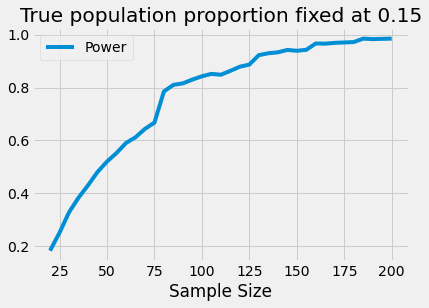

In [296]:
# plot !!!
# power should increase as sample size increases
# there may be small kinks because it is empirical, not theoretical power 

sample_size_power.plot(x='Sample Size', y='Power')
plt.title('True population proportion fixed at 0.15');

In [297]:
### study power vs. effect size

# assume sample_size is 100
sample_size = 100
# vary population proportion from 0.1 to 0.255
pop_p = np.arange(0.10, 0.26, 0.005)
# place holder for power for each pop_p
powers = []

for pp in pop_p:
    null_dist = null_sampling_dist(sample_size = sample_size)
    obs_stat = gen_obs_stat(pop_p = pp, sample_size=sample_size)
    p_values = cal_p_values(obs_stat, null_dist)
    power = cal_power(p_values, alpha=0.05)
    powers = np.append(powers, power)

In [298]:
# put in a dataframe
effect_size_power = pd.DataFrame({'True Population Proportion': pop_p, 'Power': powers})
# effect size is the difference between true population proportion and the null proportion
# for example, if null proportion is 0.26, but data was generated from population proportion of 0.15
# effect size = 0.26 - 0.15 = 0.11
effect_size_power['Effect Size'] = 0.26 - effect_size_power['True Population Proportion']
effect_size_power

,True Population Proportion,Power,Effect Size
0,0.100,0.9957,0.160
1,0.105,0.9912,0.155
2,0.110,0.9889,0.150
3,0.115,0.9823,0.145
4,0.120,0.9705,0.140
5,0.125,0.9612,0.135
6,0.130,0.9414,0.130
7,0.135,0.9187,0.125
8,0.140,0.8996,0.120
9,0.145,0.8775,0.115


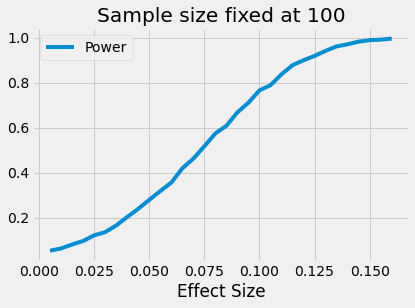

In [299]:
# plot !!!
# power should increase as effect size increases

effect_size_power.plot(x='Effect Size', y='Power')
plt.title('Sample size fixed at 100');

## Part II: NHANES Case Study

In this part, we will be working with the [NHANES](https://www.cdc.gov/nchs/nhanes/index.htm) study (National Health and Nutrition Examination Survey) data from the 2015-2016 wave. The raw data for this study are available [here](https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2015)

In [300]:
nhanes = pd.read_csv("nhanes_2015_2016.csv")
nhanes.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


### Exploring the contents of a data set

Pandas has a number of basic ways to understand what is in a data set.  For example, above we used the '`shape`' method to determine the numbers of rows and columns in a data set.  The columns in a Pandas data frame have names, to see the names, use the '`columns`' method:

In [301]:
print(nhanes.shape)
nhanes.columns

(5735, 28)


Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

These names correspond to variables in the NHANES study.  For example, `SEQN` is a unique identifier for one person, and `BMXWT` is the subject's weight in kilograms ("BMX" is the NHANES prefix for body measurements). You can search for variable names and read about the description [here](https://wwwn.cdc.gov/nchs/nhanes/search/default.aspx)

The variables in the NHANES data set are documented in a set of "codebooks" that are available on-line. The codebooks for the 2015-2016 wave of NHANES can be found by following the links at the following page:

* [Demographics code book](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm)

* [Body measures code book](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm)

* [Blood pressure code book](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm)

* [Alcohol questionaire code book](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.htm)

* [Smoking questionaire code book](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/SMQ_I.htm)

For convenience, let's rename some of the variables to be descriptive.

In [302]:
new_col_names = {'SEQN':'ID', 'ALQ130':'avg_drinks_per_day', 'SMQ020': 'smoker', 
                 'RIAGENDR':'gender', 'RIDAGEYR':'age', 'RIDRETH1':'race', 
                 'DMDCITZN':'citizen', 'DMDEDUC2':'educ_level', 
                 'DMDMARTL':'mari_stat', 'INDFMPIR':'fam_pov_income_ratio', 
                 'BPXSY1':'systolic_bp', 'BPXDI1':'diastolic_bp', 
                 'BMXWT':'weight', 'BMXHT':'height', 'BMXBMI':'bmi', 
                 'BMXLEG':'upper_leg_len', 'BMXARML':'upper_arm_len', 
                 'BMXARMC': 'arm_cir', 'BMXWAIST':'waist_cir'}

In [303]:
nhanes.rename(columns=new_col_names, inplace=True)
nhanes.head()

,ID,ALQ101,ALQ110,avg_drinks_per_day,smoker,gender,age,race,citizen,educ_level,...,BPXSY2,BPXDI2,weight,height,bmi,upper_leg_len,upper_arm_len,arm_cir,waist_cir,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [304]:
nhanes.dtypes

ID                        int64
ALQ101                  float64
ALQ110                  float64
avg_drinks_per_day      float64
smoker                    int64
gender                    int64
age                       int64
race                      int64
citizen                 float64
educ_level              float64
mari_stat               float64
DMDHHSIZ                  int64
WTINT2YR                float64
SDMVPSU                   int64
SDMVSTRA                  int64
fam_pov_income_ratio    float64
systolic_bp             float64
diastolic_bp            float64
BPXSY2                  float64
BPXDI2                  float64
weight                  float64
height                  float64
bmi                     float64
upper_leg_len           float64
upper_arm_len           float64
arm_cir                 float64
waist_cir               float64
HIQ210                  float64
dtype: object

As we see here, most of the variables have floating point or integer data type.  Unlike many data sets, NHANES does not use any text values in its data.  For example, while many datasets would use text labels like "F" or "M" to denote a subject's gender, this information is represented in NHANES with integer codes.  The actual meanings of these codes can be determined from the codebooks.  For example, the variable `RIAGENDR` contains each subject's gender, with male gender coded as `1` and female gender coded as `2`.  The `RIAGENDR` variable is part of the demographics component of NHANES, so this coding can be found in the demographics codebook. Variables like `BMXWT` which represent a quantitative measurement will typically be stored as floating point data values.

### Missing values


When reading a dataset using Pandas, there is a set of values including 'NA', 'NULL', and 'NaN' that are taken by default to represent a missing value.  The full list of default missing value codes is in the '`read_csv`' documentation [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).  This document also explains how to change the way that '`read_csv`' decides whether a variable's value is missing.

Pandas has functions called `isnull` and `notnull` that can be used to identify where the missing and non-missing values are located in a data frame.  Below we use these functions to find out which columns contain missing values, the number of missing values, and which records/rows exactly contain the missing values. 

In [305]:
# df.isnull().any will return True columns that contain missing value
# a lot of the columns has missing values in this case
nhanes.isnull().any()

ID                      False
ALQ101                   True
ALQ110                   True
avg_drinks_per_day       True
smoker                  False
gender                  False
age                     False
race                    False
citizen                  True
educ_level               True
mari_stat                True
DMDHHSIZ                False
WTINT2YR                False
SDMVPSU                 False
SDMVSTRA                False
fam_pov_income_ratio     True
systolic_bp              True
diastolic_bp             True
BPXSY2                   True
BPXDI2                   True
weight                   True
height                   True
bmi                      True
upper_leg_len            True
upper_arm_len            True
arm_cir                  True
waist_cir                True
HIQ210                   True
dtype: bool

As an aside, note that there may be a variety of distinct forms of missingness in a variable, and in some cases it is important to keep these values distinct.  For example, in case of the DMDEDUC2 variable, in addition to the blank or NA values that Pandas considers to be missing, three people responded "don't know" (code value 9).  In many analyses, the "don't know" values will also be treated as missing, we will fix those later.

In [306]:
# this returns the number of missing values in each column
nhanes.isnull().sum()

ID                         0
ALQ101                   527
ALQ110                  4004
avg_drinks_per_day      2356
smoker                     0
gender                     0
age                        0
race                       0
citizen                    1
educ_level               261
mari_stat                261
DMDHHSIZ                   0
WTINT2YR                   0
SDMVPSU                    0
SDMVSTRA                   0
fam_pov_income_ratio     601
systolic_bp              334
diastolic_bp             334
BPXSY2                   200
BPXDI2                   200
weight                    69
height                    62
bmi                       73
upper_leg_len            390
upper_arm_len            308
arm_cir                  308
waist_cir                367
HIQ210                  1003
dtype: int64

In [307]:
# this returns all the rows where BMI is missing
nhanes[nhanes['bmi'].isnull()]

,ID,ALQ101,ALQ110,avg_drinks_per_day,smoker,gender,age,race,citizen,educ_level,...,BPXSY2,BPXDI2,weight,height,bmi,upper_leg_len,upper_arm_len,arm_cir,waist_cir,HIQ210
201,84075,1.0,NaN,NaN,1,1,62,3,1.0,3.0,...,126.0,74.0,NaN,178.9,NaN,NaN,NaN,NaN,NaN,2.0
216,84103,NaN,NaN,NaN,1,1,33,3,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
220,84108,2.0,1.0,1.0,1,1,63,3,1.0,5.0,...,114.0,58.0,NaN,186.5,NaN,41.0,40.9,31.2,97.5,1.0
242,84147,1.0,NaN,NaN,2,1,78,1,2.0,1.0,...,120.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
275,84203,1.0,NaN,3.0,2,1,21,4,1.0,5.0,...,120.0,68.0,118.1,NaN,NaN,51.5,46.0,40.2,114.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5574,93421,2.0,2.0,NaN,2,2,80,1,2.0,1.0,...,124.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
5595,93455,NaN,NaN,NaN,1,1,73,1,1.0,2.0,...,112.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
5640,93538,1.0,NaN,2.0,2,1,28,3,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
5696,93629,NaN,NaN,NaN,1,2,51,3,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


### Translation of all the categorical variables
For convenience, we list all the number code with informative text category names here, and we code missing values in those categorical variables properly.

- Gender:
    - 1: Male
    - 2: Female
- Smoker (smoked at least 100 cigarettes in life):
    - 1: Yes
    - 2: No
- Race: 
    - 1: Mexican American
    - 2: Other Hispanic
    - 3: Non-Hispanic White
    - 4: Non-Hispanic Black
    - 5: Other Race Including Multi-Racial
- Education Level:
    - 1: < 9th grade
    - 2: 9-11th grade
    - 3: HS/GED
    - 4: Some college/AA
    - 5: College
- Marital Status:
    - 1: Married
    - 2: Widowed
    - 3: Divorced
    - 4: Separated
    - 5: Never married
    - 6: Living w/partner
- Citizenship:
    - 1: US Citizen
    - 2: Non US Citizen

In [308]:
# replace some code as missing values
nhanes['avg_drinks_per_day'] =  nhanes['avg_drinks_per_day'].replace({777:np.NaN, 999:np.NaN})
nhanes['smoker'] = nhanes['smoker'].replace({7:np.NaN, 9:np.NaN})
nhanes['educ_level'] = nhanes['educ_level'].replace({7:np.NaN, 9:np.NaN})
nhanes['mari_stat'] = nhanes['mari_stat'].replace({77:np.NaN})
nhanes['citizen'] = nhanes['citizen'].replace({7:np.NaN, 9:np.NaN})

### Graphical Exploration

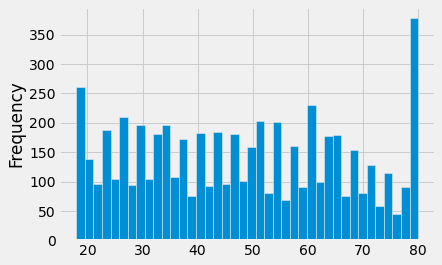

In [309]:
# age distribution
nhanes['age'].plot(kind='hist', bins=40);

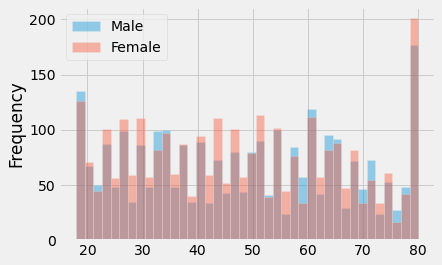

In [310]:
# age by gender
nhanes[nhanes['gender']==1]['age'].plot(kind='hist', bins=40, label='Male', alpha=0.4)
nhanes[nhanes['gender']==2]['age'].plot(kind='hist', bins=40, label='Female', alpha=0.4)
plt.legend();

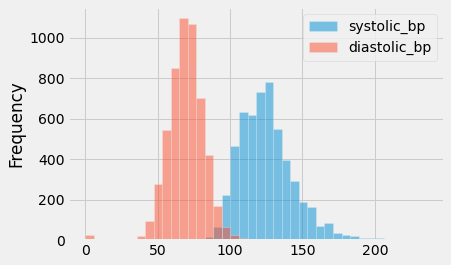

In [311]:
# histogram of blood pressure
nhanes[['systolic_bp', 'diastolic_bp']].plot(kind='hist', bins=40, alpha=0.5);

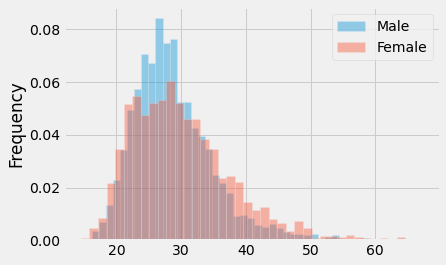

In [312]:
# BMI by gender
nhanes[nhanes['gender']==1]['bmi'].plot(kind='hist', bins=40, density=True, label='Male', alpha=0.4)
nhanes[nhanes['gender']==2]['bmi'].plot(kind='hist', bins=40, density=True, label='Female', alpha=0.4)
plt.legend();

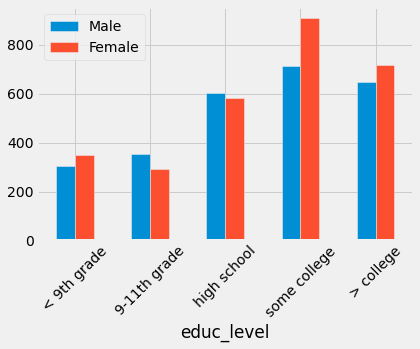

In [313]:
# gener and education level 
# create a pivot table for ed level and gender
ed_gender = nhanes.pivot_table(index='educ_level', columns='gender', values='ID', aggfunc='count', fill_value=0)
ed_gender.plot(kind='bar')
# fix gender label
plt.legend(['Male','Female'])
# fix ed level label
plt.xticks(np.arange(5),['< 9th grade', '9-11th grade', 'high school', 'some college', '> college'], rotation=45);

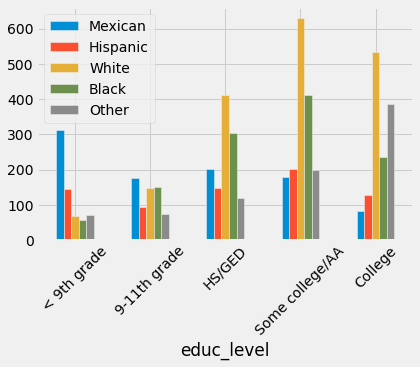

In [314]:
# race and education level 
ed_race = nhanes.pivot_table(index='educ_level', columns='race', values='ID', aggfunc='count', fill_value=0)
ed_race.plot(kind='bar')
# fix race label: Mexican American, Other Hispanic, Non-Hispanic White,Non-Hispanic Black,Other Race Including Multi-Racial
plt.legend(['Mexican','Hispanic','White','Black','Other'])
# fix ed level label: from codebook
plt.xticks(np.arange(5),['< 9th grade', '9-11th grade', 'HS/GED', 'Some college/AA', 'College'], rotation=45);

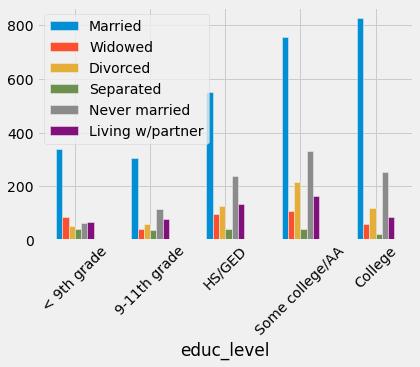

In [315]:
# education and marital status
ed_mar = nhanes.pivot_table(index='educ_level', columns='mari_stat', values='ID', aggfunc='count', fill_value=0)
ed_mar.plot(kind='bar')
# fix marital status label
plt.legend(['Married','Widowed','Divorced','Separated','Never married', 'Living w/partner'])
# fix ed level label: from codebook
plt.xticks(np.arange(5),['< 9th grade', '9-11th grade', 'HS/GED', 'Some college/AA', 'College'], rotation=45);

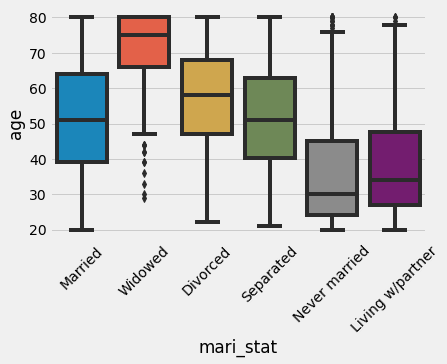

In [316]:
# age distribution by marital status
sns.boxplot(y='age', x='mari_stat', data=nhanes)
plt.xticks(np.arange(6), ['Married','Widowed','Divorced','Separated','Never married', 'Living w/partner'], rotation=45);

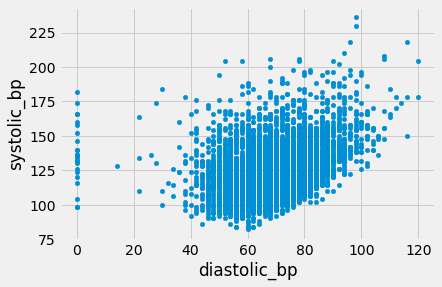

In [317]:
# blood pressure 
nhanes.plot(kind='scatter', y='systolic_bp', x='diastolic_bp');

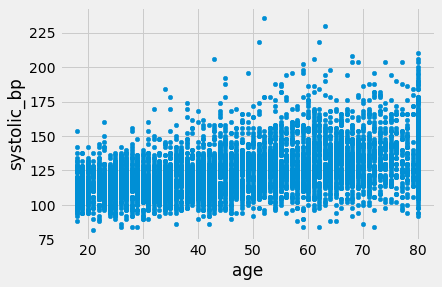

In [318]:
# age and blood pressure 
nhanes.plot(kind='scatter', y='systolic_bp', x='age');

### Part II  HW Questions Start Here

For each of the hypothesis testing problems, please state the null hypothesis and alternative hypothesis clearly, and indicate whether the alternative is one-sided or two-sided. Select a statistical test that is appropriate and implement it in one or multiple ways. Assume significant level $\alpha = 0.05$ unless otherwise stated.

[`scipy.stats` statistical tests](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests)

**Question 2.1**:

Suppose that the proportion of smokers in the US was known to be 40%, and we wished to assess whether the proportion of smokers in the NHANES data were different from 40%. Notice the `Smoker` column indicates the status of smoking, and we will ignore all the missing data, and take the proportion of `Smoker` coded 1 as smokers. 

Carry out the test for population proportion of smokers being 40%. Do this in three ways!

**Solution**:

Null hypothesis: The proportion of smokers in the US is 40%

Alternative hypothesis: The proportion of smokers in the US is different than 40%

In [319]:
# define smoker, exclude missing values
smoker = nhanes['smoker'].dropna()==1

In [321]:
p = 0.4
p_hat = np.average(smoker)
n = len(smoker)

First carry out this test "by hand": according to CLT, under the null:
$$ \frac{\hat{p} - p}{\sqrt{p(1-p)/n}} \sim \text{N}(0, 1) $$


In [322]:
z_score = (p_hat-p)/((p*(1-p))/n)**0.5
p_value = st.norm(0, 1).cdf(-z_score) + (1-st.norm(0, 1).cdf(z_score))
print(z_score, p_value)

0.7823563854332805 0.4340051581348052


Carry out the same test using [`statsmodels.stats.proportion.proportions_ztest`](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html#statsmodels.stats.proportion.proportions_ztest):

In [323]:
sm.stats.proportions_ztest(count=sum(smoker), nobs=len(smoker), value=0.4, alternative='two-sided')
# this returns z-score and p-value

(0.7807518954896244, 0.43494843171868214)

In [332]:
z_score = (p_hat-p)/((p_hat*(1-p_hat))/n)**0.5
z_score

0.7807518954896243

Carry out the same test using [`statsmodels.stats.proportion.binom_test`](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.binom_test.html):

In [324]:
sm.stats.binom_test(count=sum(smoker), nobs=len(smoker), prop=0.4, alternative="two-sided")
# this only returns p-value, why is it slightly different?

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:67: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


0.43403608544100336

Carry out the same test using [`scipy.stats.binom_test`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom_test.html#scipy.stats.binom_test):

In [325]:
st.binom_test(x=sum(smoker), n=len(smoker), p=0.4, alternative='two-sided')
# this only returns p-value and it should be exactly the same as the above one

0.43403608544100336

**Conclusion**:

We fail to reject $H_0$, because there is no enough evidence to demonstrate the observed data differ in distribution to the null data, taking into account that $p-value > \alpha$. In other words, we don't have enough evidence to say that the proportion is different than 40%

**Question 2.2**:

We are interested in comparing BMI between male and female population. In general, we hypothesize the average BMI index in the female population is slightly higher than in male population. Carry out the test to answer this question. You can assume the BMI index follows normal distribution in the general population.

**Solution**:

Null hypothesis: the average BMI index for male and female are the same.

Alternative hypothesis: the BMI index for female is higher than in male population.

In [326]:
BMI_male = nhanes[nhanes['gender']==1]['bmi'].dropna()
BMI_female = nhanes[nhanes['gender']==2]['bmi'].dropna()
print("Average male BMI is %.3f" % np.mean(BMI_male), "with standard deviation: %.3f" % np.std(BMI_male))
print("Average female BMI is %.3f" % np.mean(BMI_female), "with standard deviation: %.3f" % np.std(BMI_female))
print("The lenght of male BMI is %i" %len(BMI_male), "and female BMI is %i" %len(BMI_female))

Average male BMI is 28.778 with standard deviation: 6.251
Average female BMI is 29.940 with standard deviation: 7.752
The lenght of male BMI is 2718 and female BMI is 2944


Which test should you use?

- [`scipy.stats.ttest_1samp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp): 1-sample t-test
- [`scipy.stats.ttest_ind`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind): 2-sample independent t-test 
- [`scipy.stats.ttest_rel`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel): 2-sample paired t-test

In [327]:
# 2-sample independent t-test 
# notice this can not perform one-sided test
BMI_test = st.ttest_ind(a = BMI_male, b = BMI_female, equal_var = False, alternative = 'two-sided')
BMI_test

Ttest_indResult(statistic=-6.228051375741995, pvalue=5.069046249149507e-10)

In [328]:
# need to divide p_value by 2, convert 2-sided to 1-sided correctly
p_value = BMI_test[1]/2
p_value

2.5345231245747537e-10

**Conclusion**:

We reject $H_0$, so we can say that the female BMI index is higher, as the $p-value < \alpha$. And the mean of female BMI index is greater than the male BMI index.

**Question 2.3**:

Are arm length and leg length the same on average? You can assume both follow normal distribution in the general population.

**Solution**:

Null hypothesis: The average arm length and the leg length are the same.

Alternative hypothesis: The arm length and the leg length are not equal.

In [329]:
arm_leg = nhanes[['upper_leg_len', 'upper_arm_len']].dropna()
arm = arm_leg['upper_arm_len']
leg = arm_leg['upper_leg_len']

In [113]:
print("Average arm length is %.3f" % np.mean(arm), "with standard deviation: %.3f" % np.std(arm))
print("Average leg length is %.3f" % np.mean(leg), "with standard deviation: %.3f" % np.std(leg))

Average arm length is 37.147 with standard deviation: 2.799
Average leg length is 38.578 with standard deviation: 3.874


Which test should you use?

- [`scipy.stats.ttest_1samp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp): 1-sample t-test
- [`scipy.stats.ttest_ind`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind): 2-sample independent t-test 
- [`scipy.stats.ttest_rel`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel): 2-sample paired t-test

In [183]:
# 2-sample paired t-test
arm_leg_test = st.ttest_rel(arm, leg, alternative = "two-sided")
arm_leg_test

Ttest_relResult(statistic=-34.27547078076742, pvalue=6.849455304108963e-233)

In [184]:
p_value = arm_leg_test[1]
p_value

6.849455304108963e-233

**Conclusion**:

We reject $H_0$. The lenght of arms and legs are not the same on average, as our p-value is way smaller compared to our alpha.

**Question 2.4**:

From the previous test, we are further interested in exploring the relationship between the arm length and leg length. Let's test whether these two are linearly associated in a positive way, i.e, positively correlated. In other words, we would like to calculate the Pearson correlation between the two and formally test whether the correlation is a positive one. Let's first create a scatter plot to visually explore the correlation:

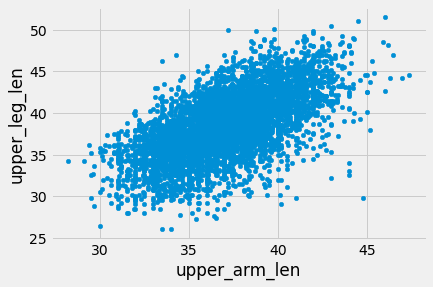

In [185]:
# arm length vs. leg length
nhanes.plot(kind='scatter', y='upper_leg_len', x='upper_arm_len');

**Solution**:

Null hypothesis: Both are uncorrelated.

Alternative hypothesis: They are correlated.

Which test to use?

- [`scipy.stats.pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr): test Pearson correlation between two numerical variables

In [186]:
cor_test = st.pearsonr(arm, leg)
cor_test

(0.6245370012742526, 0.0)

In [187]:
p_value = cor_test[1]
p_value

0.0

**Conclusion**:

We reject the $H_0$. The two parameters are correlated. The p_value returned from the function is really small, so we reject the $H_0$.

If you are feeling fancy, we can create a plot with hypothesis testing result for the Pearson correlation:

AttributeError: 'JointGrid' object has no attribute 'annotate'

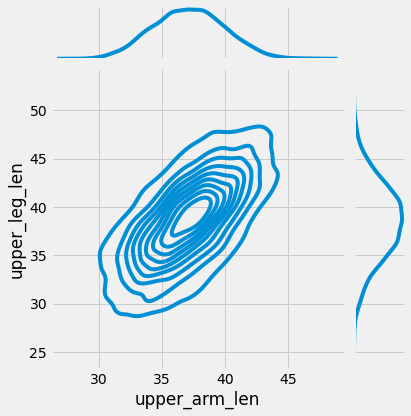

In [198]:
# sns contour plot with kernal density estimate
# also performing a hypothesis test on Pearson correlation
# ignore the warning message
sns.jointplot(kind='kde', y='upper_leg_len', x='upper_arm_len', data=nhanes).annotate(st.pearsonr);

**Question 2.5**:

We want to test whether the age distribution in the NHANES dataset is normal.  

**Solution**:

Null hypothesis: The age distribution follows a normal distribution

Alternative hypothesis: The age distribution does not follow a normal distribution.

Which test to use? All three can be used, but using different test statistics. 

- [`scipy.stats.kstest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest): Performs the (one-sample or two-sample) Kolmogorov-Smirnov test for goodness of fit.
- [`scipy.stats.shapiro`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#scipy.stats.shapiro): Perform the Shapiro-Wilk test for normality.
- [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html#scipy.stats.normaltest): Test whether a sample differs from a normal distribution.

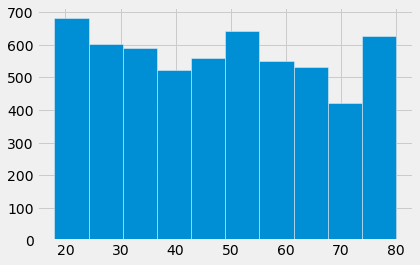

In [208]:
age = nhanes['age'].dropna()
plt.hist(age)
plt.show()

In [200]:
norm_test = st.normaltest(age)
norm_test

NormaltestResult(statistic=2926.957777430139, pvalue=0.0)

In [202]:
p_value = norm_test[1]
p_value

0.0

**Conclusion**:

We reject the $H_0$, because the value is really is small. This means that the age distribution does not follow a normal distribution.

**Question 2.6**:
We would like to further test whether the age distribution of male and female are the same in the NHANES dataset. 

**Solution**:

Null hypothesis: The age distribution of male and female are the same.

Alternative hypothesis: The age distribution of male and female are not the same.

Which test to use?

- [`scipy.stats.kstest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest): Performs the (one-sample or two-sample) Kolmogorov-Smirnov test for goodness of fit.
- [`scipy.stats.ks_1samp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_1samp.html#scipy.stats.ks_1samp): one-sample Kolmogorov-Smirnov test for goodness of fit.
- [`scipy.stats.ks_2samp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html#scipy.stats.ks_2samp): two-sample Kolmogorov-Smirnov test for goodness of fit.

In [213]:
male_age = nhanes[nhanes['gender']==1]['age'].dropna()
female_age = nhanes[nhanes['gender']==2]['age'].dropna()

In [214]:
gender_age_test = st.ks_2samp(male_age, female_age)
gender_age_test

KstestResult(statistic=0.03280929080584753, pvalue=0.08904003761553114)

In [273]:
p_value = gender_age_test[1]
p_value

0.08904003761553114

**Conclusion**:

We don't reject $H_0$, as the p_value is greater than the alpha. This means we don't have enough evidence to say that the age distribution of male and female are different.

**Question 2.7**:
We would like to test whether marital status and education level are independent. 

**Solution**:

Null hypothesis: Marital status and education level are independent to each other.

Alternative hypothesis: They are dependent.

Which test to use?

- [`scipy.stats.chi2_contingency`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html#scipy.stats.chi2_contingency): Chi-square test of independence of variables in a contingency table.
- [`scipy.stats.chisquare`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html#scipy.stats.chisquare): one-sample Kolmogorov-Smirnov test for goodness of fit.

In [216]:
# remember this pivot table we used to create bar plots
# this is marital status by education level
ed_mar

mari_stat,1.0,2.0,3.0,4.0,5.0,6.0
educ_level,,,,,,
1.0,341,88,52,43,65,66
2.0,305,40,62,39,117,80
3.0,550,99,127,40,237,133
4.0,757,108,217,42,332,163
5.0,827,59,120,22,253,85


In [217]:
# make the pivot table look nice with informative labels
ed_mar.rename(columns={1:'Married', 2:'Widowed', 3:'Divorced', 4:'Separated', 5:'Never married', 6:'Living w/partner'}, 
              index={1:'< 9th grade', 2:'9-11th grade', 3:'HS/GED',  4:'Some college/AA', 5:'College'},
              inplace=True)
ed_mar

mari_stat,Married,Widowed,Divorced,Separated,Never married,Living w/partner
educ_level,,,,,,
< 9th grade,341,88,52,43,65,66
9-11th grade,305,40,62,39,117,80
HS/GED,550,99,127,40,237,133
Some college/AA,757,108,217,42,332,163
College,827,59,120,22,253,85


In [218]:
ind_test = st.chi2_contingency(ed_mar)
ind_test

(218.0466954816882,
 2.928937568726158e-35,
 20,
 array([[332.94935089,  47.1877857 ,  69.22472116,  22.27646736,
         120.24501737,  63.11665752],
        [326.84951545,  46.32327665,  67.95648199,  21.86834888,
         118.04205522,  61.96032181],
        [602.86706893,  85.44231121, 125.34430426,  40.33571037,
         217.72609252, 114.28451271],
        [822.96946425, 116.63667947, 171.10660084,  55.06198574,
         297.21631011, 156.00895959],
        [694.36460048,  98.40994697, 144.36789175,  46.45748766,
         250.77052478, 131.62954836]]))

In [219]:
p_value = ind_test[1]
p_value

2.928937568726158e-35

**Conclusion**:

We reject $H_0$, therefore we can say that they are not independent. This is because the p_value is less than alpha.

WooHoo~~ You're done with HW 4!  Be sure to...

* **Save and Checkpoint** from the File menu,
* **Close and Halt** from the File menu,
* **Rename your ipynb file**, replacing LASTNAME with your last name,
* **Upload** your file to the course website.